In the previous two notebooks, we did some basic initial exploration of the data, and then we cleaned the data to remove any null values. The next step is to do further exploration of the data to gain some ideas as to what variables seem most important and also which ones might be correlated with one another. From our results, we may also create new features - this later step is called feature engineering.

The following code block just cleans our data set - it uses the same steps found in part 2. See part 2 for expanations and justifications for those steps.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
train_df['Embarked'].fillna("S",inplace=True)

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


We notice that our data set contains categorical data for name, sex, and embarked. For our numerical analysis, we will have to convert the categorical variables to numerical numbers. By using the pandas get_dummies function, we create new columns for Sex_female, Sex_male, Embarked_C, Embarked_Q, and Embarked_S. We add those columns to our dataframe, and delete the now-redundant columns, "Sex" and "Embarked." We then perform the same methods on the training set.

In [3]:
df_sex = pd.get_dummies(train_df[['Sex']])
df_embarked = pd.get_dummies(train_df[['Embarked']])
train_new = pd.concat([train_df,df_sex,df_embarked],axis=1)
train_new.drop('Sex',1,inplace=True)
train_new.drop('Embarked',1,inplace=True)

In [4]:
train_new.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


To keep our changes consistent, we perform the same transformations that we did on the training set also on the test set.

In [5]:
df_sex_test = pd.get_dummies(test_df[['Sex']])
df_embarked_test = pd.get_dummies(test_df[['Embarked']])
test_new = pd.concat([test_df,df_sex_test,df_embarked_test],axis=1)
test_new.drop('Sex',1,inplace=True)
test_new.drop('Embarked',1,inplace=True)
test_new.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,1,0,0,0,1


Next, let's look at some possible correlations.

An often used graphing method is a heatmap, which plots the correlation coefficients between variables.

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


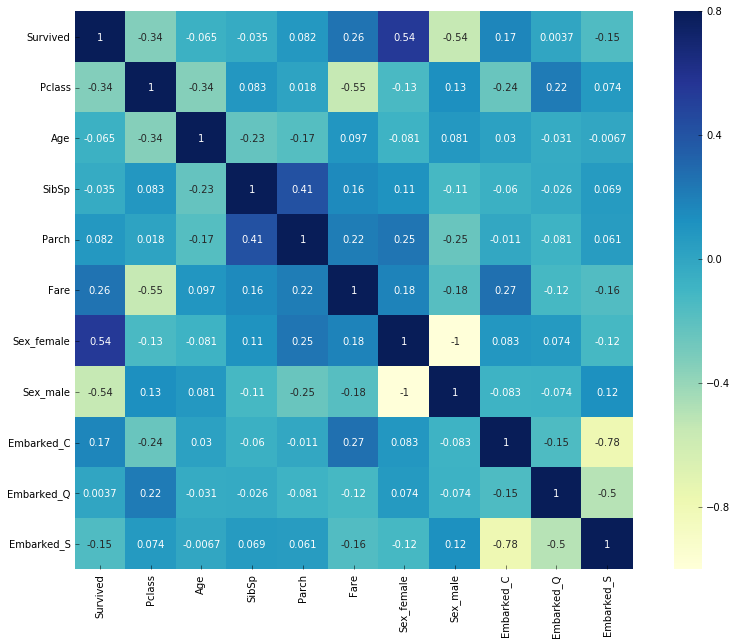

In [6]:
plt.subplots(figsize=(15,10))
sn.heatmap(train_new.drop("PassengerId",axis=1).corr(), vmax=0.8,square=True,annot=True,cmap="YlGnBu")

We see that a strong correlation whether someone was female and whether they survived. We also see a correlation between fare and survival - it seems that people who paid higher fares are more likely to have survived.

We still haven't finished our conversion of categorical data to numerical data. The variable "Name" remains. We'll borrow from the kaggle tutorial by [Ahmed Besbes](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html) a line of code for the function below, here we've called the function "extract_title," to get the title from the Name of each passenger. We'll also drop the "Name" category from our dataframes and take a quick lead at the first few rows of the dataframe to make sure everything went well.


In [7]:
def extract_title():
    train_new['Title'] = train_new['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    test_new['Title'] = test_new['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    train_new.drop('Name',1,inplace=True)
    test_new.drop('Name',1,inplace=True)
extract_title()
train_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,Mr
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,Mrs
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,Miss
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,Mrs
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,Mr


We thus created a new feature called "Title," but it is still categorical. We'll have to make a decision about how we will convert this feature to a numerical value.